<a href="https://colab.research.google.com/github/joeymaillette04/ToyotaCV/blob/AdaptiveMeanThresholding/toyotaChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
OpenCV-Python Lib Version: 4.7.0
Python Version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
/content/gdrive/My Drive/Toyota Challenge/Training Images/Red/6_some_holes_covered.jpg


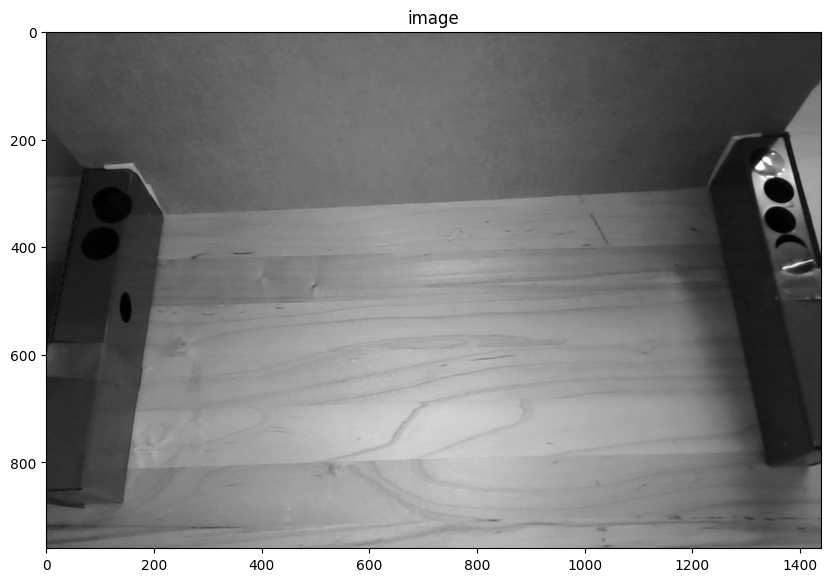

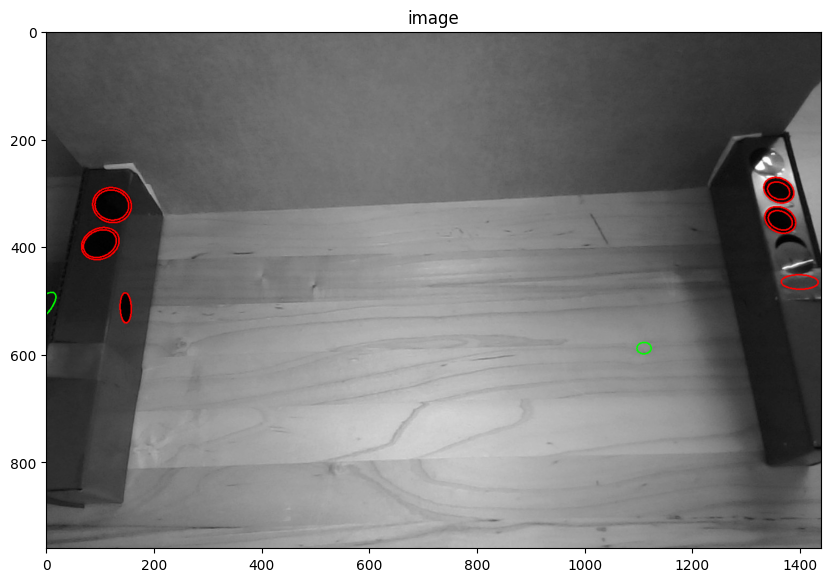

In [32]:
from string import whitespace
from google.colab import drive
drive.mount('/content/gdrive')

# import dependencies
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

#Get Python and OpenCV Version
print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

#global variables

#folders (str format)
METAL = "Metal"
RED = "Red"
whitespace = "White"

#imaging options
RGB = "RGB"
GRAYSCALE = "GRAYSCALE"
BINARY = "BINARY"

def main():
    # Get the image
    img = getImgObject(RED, "6_some_holes_covered.jpg", GRAYSCALE)
    if img is None:
        print("Image not loaded")
        return

    # Apply adaptive mean thresholding
    img_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Prepare a color version of the image for visualization
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Loop through the contours and hierarchy
    for i, cnt in enumerate(contours):
        # We need at least 5 points to fit an ellipse
        if len(cnt) >= 5:
            ellipse = cv2.fitEllipse(cnt)
            # Get the size of the ellipse
            (center_x, center_y), (MA, ma), angle = ellipse
            # Calculate the ratio of the major axis to the minor axis
            ratio = ma / MA if MA > 0 else 0
            # If the size of the ellipse and the ratio are within the range, draw it
            if 20 <= MA <= 100 and 20 <= ma <= 100 and 1 <= ratio <= 3:
                # Check if it has a child contour (indicating overlap)
                if hierarchy[0][i][2] != -1:
                    # Draw the overlapping ellipse in red
                    cv2.ellipse(img_color, ellipse, (0, 0, 255), 2)
                else:
                    # Draw the normal ellipse in green
                    cv2.ellipse(img_color, ellipse, (0, 255, 0), 2)

    # Display the original image and the result
    printToScreen(img, True)
    printToScreen(img_color, False)


def getImgObject(folder, file, imaging):
  string = '/content/gdrive/My Drive/Toyota Challenge/Training Images/' + folder + "/" + file
  
  print(string)

  if(imaging=="RGB"):
    img = cv2.imread(string, cv2.IMREAD_UNCHANGED)
  elif(imaging=="GRAYSCALE"):
    img = cv2.imread(string, cv2.IMREAD_GRAYSCALE)
  else:
    gray = cv2.imread(string, cv2.IMREAD_GRAYSCALE)
    # binary threshholding -> convert grayscale -> binary img
    ret, img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  return img

def printToScreen(img, grayQ):
  plt.figure(figsize=(10,10))
  if (grayQ):
    plt.imshow(img, cmap="gray")
  else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  plt.title('image')
  plt.show()

main()